## NLP6. 임베딩 내 편향성 알아보기

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import konlpy
import gensim
import sklearn
import seaborn as sns

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(sns.__version__)

0.5.2
4.1.2
1.0
0.11.2


In [2]:
import os

data_dir = '~/aiffel/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

In [3]:
w2v

### appending만 하는 read_token 함수 정의

In [4]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

def read_token(file_name):
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        okt = Okt()
        result = []
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append(word[0]) 
        tokenized.append(result)
    
print("슝~")

슝~


In [5]:
import re
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 'synopsis_mystery.txt', 
             'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt', 'synopsis_drama.txt']

genre = []

for i in genre_txt:
    genre.append(re.sub('synopsis_',"",i.split(".")[0])) 
       
print(genre)    

tokenized = []
for k in genre :
        read_token('synopsis_{}.txt'.format(k))               

['SF', 'family', 'show', 'horror', 'etc', 'documentary', 'romance', 'musical', 'mystery', 'crime', 'historical', 'western', 'adult', 'thriller', 'animation', 'action', 'adventure', 'war', 'comedy', 'fantasy', 'drama']
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.


In [6]:
print(tokenized[0][0:10]) #단어분리 제대로 됐는지 확인

['시간', '지명', '알', '수', '한국', '가상', '도시', '산성비', '오염', '이']


In [7]:
from gensim.models import Word2Vec

#tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)

model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['이순신'])

[('감각', 0.9884633421897888),
 ('심리', 0.988108217716217),
 ('미국인', 0.9880681037902832),
 ('층', 0.9880009889602661),
 ('조국', 0.9879988431930542),
 ('창', 0.9879394173622131),
 ('기념', 0.9879378080368042),
 ('자극', 0.9879199862480164),
 ('태국', 0.9878495335578918),
 ('전통', 0.9878275394439697)]

In [8]:
len(tokenized)

21

In [9]:
vectorizer = TfidfVectorizer()
X = []*21
for i in range(0,21): 
    X.append(vectorizer.fit_transform(tokenized[i]))

idx_u = 0    
for i in range(0,21):
    print('장르 {}의 카디널러티는 {} 입니다.'.format(genre[i],(X[i].shape)[1]))
    idx_u += (X[i].shape)[1]
print('총 카디널러티는 {} 입니다.'.format(idx_u))    

장르 SF의 카디널러티는 4698 입니다.
장르 family의 카디널러티는 2470 입니다.
장르 show의 카디널러티는 2229 입니다.
장르 horror의 카디널러티는 7761 입니다.
장르 etc의 카디널러티는 8036 입니다.
장르 documentary의 카디널러티는 16162 입니다.
장르 romance의 카디널러티는 10744 입니다.
장르 musical의 카디널러티는 1397 입니다.
장르 mystery의 카디널러티는 3745 입니다.
장르 crime의 카디널러티는 6004 입니다.
장르 historical의 카디널러티는 1416 입니다.
장르 western의 카디널러티는 455 입니다.
장르 adult의 카디널러티는 5045 입니다.
장르 thriller의 카디널러티는 6979 입니다.
장르 animation의 카디널러티는 12844 입니다.
장르 action의 카디널러티는 12925 입니다.
장르 adventure의 카디널러티는 3088 입니다.
장르 war의 카디널러티는 2635 입니다.
장르 comedy의 카디널러티는 13766 입니다.
장르 fantasy의 카디널러티는 3174 입니다.
장르 drama의 카디널러티는 24040 입니다.
총 카디널러티는 149613 입니다.


In [10]:
idx_uu = 0
idx_c = list(range(len(genre)))
for i in range(0,21):
    idx_uu += (X[i].shape)[1]
    idx_c[i] = idx_uu
    print('장르 {}의 column 슬라이싱은 {}~{} 번째까지 입니다.'.format(genre[i],idx_uu-(X[i].shape)[1],idx_uu-1))

장르 SF의 column 슬라이싱은 0~4697 번째까지 입니다.
장르 family의 column 슬라이싱은 4698~7167 번째까지 입니다.
장르 show의 column 슬라이싱은 7168~9396 번째까지 입니다.
장르 horror의 column 슬라이싱은 9397~17157 번째까지 입니다.
장르 etc의 column 슬라이싱은 17158~25193 번째까지 입니다.
장르 documentary의 column 슬라이싱은 25194~41355 번째까지 입니다.
장르 romance의 column 슬라이싱은 41356~52099 번째까지 입니다.
장르 musical의 column 슬라이싱은 52100~53496 번째까지 입니다.
장르 mystery의 column 슬라이싱은 53497~57241 번째까지 입니다.
장르 crime의 column 슬라이싱은 57242~63245 번째까지 입니다.
장르 historical의 column 슬라이싱은 63246~64661 번째까지 입니다.
장르 western의 column 슬라이싱은 64662~65116 번째까지 입니다.
장르 adult의 column 슬라이싱은 65117~70161 번째까지 입니다.
장르 thriller의 column 슬라이싱은 70162~77140 번째까지 입니다.
장르 animation의 column 슬라이싱은 77141~89984 번째까지 입니다.
장르 action의 column 슬라이싱은 89985~102909 번째까지 입니다.
장르 adventure의 column 슬라이싱은 102910~105997 번째까지 입니다.
장르 war의 column 슬라이싱은 105998~108632 번째까지 입니다.
장르 comedy의 column 슬라이싱은 108633~122398 번째까지 입니다.
장르 fantasy의 column 슬라이싱은 122399~125572 번째까지 입니다.
장르 drama의 column 슬라이싱은 125573~149612 번째까지 입니다.


In [11]:
idx_uv = 0
idx_r = list(range(len(X)))
for i in range(0,21):
    idx_uv += (X[i].shape)[0]
    idx_r[i] = idx_uv
    print('장르 {}의 row 슬라이싱은 {}~{} 번째까지 입니다.'.format(genre[i],idx_uv-(X[i].shape)[0],idx_uv-1))

장르 SF의 row 슬라이싱은 0~21711 번째까지 입니다.
장르 family의 row 슬라이싱은 21712~29717 번째까지 입니다.
장르 show의 row 슬라이싱은 29718~37701 번째까지 입니다.
장르 horror의 row 슬라이싱은 37702~95503 번째까지 입니다.
장르 etc의 row 슬라이싱은 95504~144528 번째까지 입니다.
장르 documentary의 row 슬라이싱은 144529~301350 번째까지 입니다.
장르 romance의 row 슬라이싱은 301351~403433 번째까지 입니다.
장르 musical의 row 슬라이싱은 403434~406875 번째까지 입니다.
장르 mystery의 row 슬라이싱은 406876~422601 번째까지 입니다.
장르 crime의 row 슬라이싱은 422602~452168 번째까지 입니다.
장르 historical의 row 슬라이싱은 452169~455788 번째까지 입니다.
장르 western의 row 슬라이싱은 455789~456713 번째까지 입니다.
장르 adult의 row 슬라이싱은 456714~501940 번째까지 입니다.
장르 thriller의 row 슬라이싱은 501941~544983 번째까지 입니다.
장르 animation의 row 슬라이싱은 544984~666859 번째까지 입니다.
장르 action의 row 슬라이싱은 666860~782420 번째까지 입니다.
장르 adventure의 row 슬라이싱은 782421~792107 번째까지 입니다.
장르 war의 row 슬라이싱은 792108~800569 번째까지 입니다.
장르 comedy의 row 슬라이싱은 800570~908001 번째까지 입니다.
장르 fantasy의 row 슬라이싱은 908002~919995 번째까지 입니다.
장르 drama의 row 슬라이싱은 919996~1297561 번째까지 입니다.


### appending 결과를 리턴해주는 두번째 함수 read_token_r 정의

In [12]:
def read_token_r(file_name):
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        okt = Okt()
        result = []
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append(word[0]) 
    return result    
print("슝~")

슝~


In [13]:
tokenized_r = list(range(21))
S = list(range(21))

for i in range(len(genre)) :
    tokenized_r[i] = read_token_r('synopsis_{}.txt'.format(genre[i]))

S[0] = tokenized_r[0]   

for i in range(1,len(tokenized)) :
    S[i] = tokenized_r[i] + S[i-1]
    
len(S[20]) 

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.


1297562

In [14]:
X_r = []
for i in range(len(tokenized_r)) :  
    attr = []          
    for w in list(set(tokenized_r[i])) :
        attr.append(w)
    X_r.append(vectorizer.fit_transform(attr))

print(len(X_r))
for i in range(len(X_r)) :
    print('장르 {}의 tfidf 변환의 shape은 {} 입니다.'.format(genre[i],X_r[i].shape))


21
장르 SF의 tfidf 변환의 shape은 (5127, 4698) 입니다.
장르 family의 tfidf 변환의 shape은 (2789, 2470) 입니다.
장르 show의 tfidf 변환의 shape은 (2506, 2229) 입니다.
장르 horror의 tfidf 변환의 shape은 (8325, 7761) 입니다.
장르 etc의 tfidf 변환의 shape은 (8592, 8036) 입니다.
장르 documentary의 tfidf 변환의 shape은 (16896, 16162) 입니다.
장르 romance의 tfidf 변환의 shape은 (11391, 10744) 입니다.
장르 musical의 tfidf 변환의 shape은 (1594, 1397) 입니다.
장르 mystery의 tfidf 변환의 shape은 (4125, 3745) 입니다.
장르 crime의 tfidf 변환의 shape은 (6483, 6004) 입니다.
장르 historical의 tfidf 변환의 shape은 (1635, 1416) 입니다.
장르 western의 tfidf 변환의 shape은 (554, 455) 입니다.
장르 adult의 tfidf 변환의 shape은 (5466, 5045) 입니다.
장르 thriller의 tfidf 변환의 shape은 (7521, 6979) 입니다.
장르 animation의 tfidf 변환의 shape은 (13552, 12844) 입니다.
장르 action의 tfidf 변환의 shape은 (13633, 12925) 입니다.
장르 adventure의 tfidf 변환의 shape은 (3428, 3088) 입니다.
장르 war의 tfidf 변환의 shape은 (2929, 2635) 입니다.
장르 comedy의 tfidf 변환의 shape은 (14520, 13766) 입니다.
장르 fantasy의 tfidf 변환의 shape은 (3537, 3174) 입니다.
장르 drama의 tfidf 변환의 shape은 (24933, 24040) 입니다.


In [15]:
m = []
w = []
for i in range (0,21):
    m.append(X_r[i].tocoo())    
    w.append([[j, k] for j, k in zip(m[i].col, m[i].data)])
    w[i].sort(key=lambda x: x[:][1], reverse=True)

print('western 영화를 대표하는 단어들:')
for j in range(100):
    print(vectorizer.get_feature_names_out()[w[11][j][0]], end=', ')

print('\n')
    
print('mystery 영화를 대표하는 단어들:')
for j in range(100):
    if w[8][j][0]>24040:
        pass
    else :
        print(vectorizer.get_feature_names_out()[w[8][j][0]], end=', ')    

western 영화를 대표하는 단어들:
강간범, 간다, 가해진, 가변, 감명, 각색, 가위표, 개간, 각성, 감안, 각고, 가바, 강박, 강대호, 간디, 강점, 간계, 가물, 가발, 가의, 갈로아, 각국, 강민혁, 간헐천, 가쁜, 가진동, 강성욱, 갈리시아, 가끔, 가도, 가필, 가로, 갑작스레, 강사, 가랑이, 감동, 강철중, 가석방, 가마, 강도, 가미, 가게, 감호소, 갓난아기, 개년, 가축, 개년록, 가향, 갈피, 가구, 개관, 갓난아이, 간판, 강요, 갈팡질팡, 가족부, 각양, 간섭, 가능, 가을방학, 간경화, 가차, 강씨, 간호사, 각인, 가명, 가브리엘, 갑판, 가야금, 간식, 간파, 가드, 간곡, 감옥살이, 감쪽, 가중, 감사용, 가입, 간단, 갈등, 개그맨, 각양각색, 가문, 가동, 강아지, 강필, 개구쟁이, 가호, 간난, 가신, 가짜, 가평, 가희, 강혜정, 개근, 강도죄, 강행, 강우, 가운, 간혹, 

mystery 영화를 대표하는 단어들:
네마, 개인주의자, 게이샤, 강의, 고아원, 개조, 고구마, 거미, 게르마늄, 기량, 가인, 꼭두, 근대화, 김형, 가루, 뇌장애, 깜빡, 네빌, 가스렌지, 긴급, 기도, 꾸중, 과수원, 길태, 고등학교, 관광버스, 교향곡, 김추자, 단종, 김진호, 고배, 가기, 그래미상, 궤변, 담당, 그레타, 김녕회관, 건기, 낙시, 늪지, 김동윤, 갱스터, 국악, 귓속말, 고다르, 기울기, 김기범, 굴다리, 나디아, 날때, 개코, 개발자, 김영서, 각성, 남용, 기자회견, 꽃꽂이, 간질, 노스, 견인, 급작스레, 김유미, 개자식, 경직, 는가, 느낌, 교사, 그디니아, 노파, 공책, 갑부, 건축가, 금발머리, 뉴포트, 내색, 넬리, 곳곳, 가락, 난독증, 공교, 늑대인간, 고환암, 나일론, 김갑수, 건가, 과속방지턱, 끌레르몽, 내과, 고물상, 당산역, 뇌종양, 고립무원, 고질, 가장이, 김수혁, 노벨문학상, 곤경, 낫질, 거꾸로, 니나, 

In [79]:
genre_name = []
genre_name = genre
target_r = []

for i in range(len(X_r)) :
    P = [X_r[i].tocoo() for i in range(len(X_r))]
    Q = [[[j,k] for j,k in zip(p.col, p.data)] for p in P]    

for i in range(len(X_r)):    
            print(genre_name[i], end=': ')
            attr = []
            j = 0
            while (len(attr) < 21):
                if (Q[i][j][0]>3174): pass
                if (vectorizer.get_feature_names_out()[Q[i][j][0]] in model.wv):
                    attr.append(vectorizer.get_feature_names_out()[Q[i][j][0]])
                    print(vectorizer.get_feature_names_out()[Q[i][j][0]], end=', ')
                j += 1    
            target_r.append(attr)
            print()

SF: 대미, 감금, 넬리, 니코, 낚시, 개발도상국, 그냥, 거주, 공이, 득실, 댄싱, 논문, 남북, 건축가, 감시자, 건설, 각기, 도훈, 두루, 감수성, 다스, 
family: 간의, 글래스고, 개념, 개그맨, 그늘, 가브리엘, 과감, 근래, 감방, 간접, 경민, 관계자, 관람객, 고하, 감동, 김수현, 교관, 구미, 간단, 공동, 김영구, 
show: 가면무도회, 경제위기, 구조대, 공립, 결성, 가명, 군대, 관계자, 경비원, 관념, 고행, 기상이변, 급우, 근근히, 개구리, 공통, 갈림길, 가부키, 교단, 권위, 기밀, 
horror: 면세, 눈곱, 까미유, 라이벌, 대낮, 만화책, 구심, 구슬, 동남아시아, 그리스도, 로어, 마운틴, 메일, 경연, 딱지, 뚱보, 뙤약볕, 기력, 몽고, 고함, 라운지, 
etc: 닌자, 고대, 발랄, 개개인, 대판, 리키, 무참, 두더지, 글래스, 배드민턴, 리기, 각심, 맑은, 모종, 동쪽, 경질, 러닝, 경찰대, 매번, 경찰, 기우, 
documentary: 애수, 그을, 성범죄자, 모조리, 남침, 이명, 경비원, 소주, 가로막, 시연, 어쨌거, 알릭스, 권선, 마미, 색칠, 사면초가, 권용민, 뮤직비디오, 등골, 이전, 불면, 
romance: 부작, 공세, 도넛, 무료, 귀국, 기준, 끈끈, 만점, 설탕, 미트라, 백정, 봉합, 고층, 다혜, 내몽고, 미연방, 고치, 무더위, 성형, 도요토미, 마나, 
musical: 개명, 게르마늄, 가루, 가트, 갱생, 거래, 경향, 경옥, 게릴라, 게임, 거란, 공공, 가티, 고추, 계시, 가해, 경유, 가필드, 격자, 개최, 개떼, 
mystery: 네마, 게이샤, 강의, 고아원, 개조, 고구마, 거미, 게르마늄, 기량, 가인, 꼭두, 근대화, 김형, 가루, 깜빡, 네빌, 긴급, 기도, 꾸중, 과수원, 고등학교, 
crime: 라틴, 대기업, 링스, 각각, 가죽, 동전, 골프, 달빛, 구체, 건기, 대승, 대기, 노아, 가요, 듀엣, 격류, 근거지, 간도, 드랙퀸, 

### target_L 리스트와 target_U 리스트 정의와 구현

In [85]:
n = 21
P = []
Q = []
h = []
for i in range(len(genre_name)):
    P.append(X_r[i].tocoo())
    Q.append([[j, k] for j, k in zip(P[i].col, P[i].data)])

for i in range(len(genre_name)):
    attr_q = []
    for j in range(100):
        attr_q.append(vectorizer.get_feature_names_out()[Q[i][j][0]])
    h.append(attr_q)
    
target_L = []*(len(genre_name)-1)
target_U = []*(len(genre_name)-1)
            
for i in range(0, len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        attr_u = []
        attr_l = []
        for k in range(100):
            if (h[i][k] not in h[j]) and (h[i][k] in model.wv): attr_l.append(h[i][k])
            if len(attr_l) == n: break 
        target_L.append(attr_l)
        for l in range(100):
            if (h[j][l] not in h[i]) and (h[j][l] in model.wv): attr_u.append(h[j][l])                
            if len(attr_u) == n: break
        target_U.append(attr_u)

print(target_L[0][0:10])
print(target_U[0][0:10])
print(target_L[1][0:10])
print(target_U[1][0:10])
print(target_U[19][0:10])

['대미', '감금', '넬리', '니코', '낚시', '개발도상국', '그냥', '거주', '공이', '득실']
['간의', '글래스고', '개념', '개그맨', '그늘', '가브리엘', '과감', '근래', '감방', '간접']
['대미', '감금', '넬리', '니코', '낚시', '개발도상국', '그냥', '거주', '공이', '득실']
['가면무도회', '경제위기', '구조대', '공립', '결성', '가명', '군대', '관계자', '경비원', '관념']
['징크스', '배척', '렌코', '매료', '갱스터', '갱년기', '양털', '연주회', '우뚝', '그랑프리']


In [18]:
z = 5
zz = len(genre_name)-1
target = []
target_LUL = []; target_LUU = []

for r in range(1,zz) :
        attr_1 = []
        attr_2 = []
        for j in range(50) :
            if(r==0): target_LU[r][j] = ''
            if (target_L[r][j] in target_U[r-1][:]) : 
                attr_1.append(target_L[r][j])
                attr_2.append(target_U[r-1][j])
        target_LUL.append(attr_1) 
        target_LUU.append(attr_2) 

print(target_LUL[1][0:10])
print(target_LUU[1][0:10])  # 동일 장르에 대한 target_L과 target_U는 독립적!

[]
[]


In [39]:
print('장르 {}에서 유일한 10개 이내의 단어들 : {}'.format(genre_name[0],target_L[0][0:10]))
for i in range(1, len(genre_name)):
    print('장르 {}에서 유일한 10개 이내의 단어들 : {}'.format(genre_name[i],target_U[i-1][0:10]))

장르 SF에서 유일한 10개 이내의 단어들 : ['대미', '골고다', '껄끄럽', '감금', '넬리', '니코', '대남', '낚시', '개발도상국', '그냥']
장르 family에서 유일한 10개 이내의 단어들 : ['간의', '글래스고', '개념', '간헐천', '견주', '검음', '개그맨', '그늘', '가브리엘', '과감']
장르 show에서 유일한 10개 이내의 단어들 : ['가면무도회', '갈락시', '간성', '과천', '경제위기', '구조대', '거취', '공립', '결성', '금곰상']
장르 horror에서 유일한 10개 이내의 단어들 : ['면세', '눈곱', '까미유', '라이벌', '대낮', '만화책', '구심', '구슬', '동남아시아', '그리스도']
장르 etc에서 유일한 10개 이내의 단어들 : ['몬베츠', '닌자', '고대', '발랄', '개개인', '나가노현', '대판', '리키', '무참', '두더지']
장르 documentary에서 유일한 10개 이내의 단어들 : ['애수', '그을', '성범죄자', '모조리', '경락', '리덕', '남침', '비릿내', '도회지', '이명']
장르 romance에서 유일한 10개 이내의 단어들 : ['부작', '공세', '도넛', '니콜스', '무료', '귀국', '베이타운', '기준', '끈끈', '만점']
장르 musical에서 유일한 10개 이내의 단어들 : ['가로수', '가향', '개명', '가리개', '게르마늄', '가루', '가트', '개신교', '계집아이', '갱생']
장르 mystery에서 유일한 10개 이내의 단어들 : ['네마', '개인주의자', '게이샤', '강의', '고아원', '개조', '고구마', '거미', '게르마늄', '기량']
장르 crime에서 유일한 10개 이내의 단어들 : ['라틴', '꽃병', '대기업', '드루이드교', '링스', '눈시울', '각각', '가죽', '동전', '라서']
장르 historical에서 유일한 10개 이내의 단어들 

In [ ]:
for i in range(0, len(genre_name)):
    print('장르 {}에서 유일한 10개 이내의 단어들 : {}'.format(genre_name[i],target_r[i][0:10]))

### 오리지널 appending 함수 read_tokenz 정의

In [21]:
def read_tokenz(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [22]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt', 'synopsis_drama.txt']
G = []
for file_name in genre_txt:
    G.append(read_tokenz(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.


In [23]:
vectorizer_1 = TfidfVectorizer()
X_t = vectorizer_1.fit_transform(G)
print(X_t.shape)

(21, 42191)


In [24]:
art_gen_txt = ['synopsis_art.txt','synopsis_gen.txt']
sort_ag = ['art','general']
art_gen = []
for file_name in art_gen_txt :
    art_gen.append(read_tokenz(file_name))

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [25]:
vectorizer_2 = TfidfVectorizer()
A = vectorizer_2.fit_transform(art_gen)
print(A.shape)

(2, 41082)


In [77]:
m = [A[i].tocoo() for i in range((A.shape)[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range((A.shape)[0]):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range((A.shape)[0]):
    print(sort_ag[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 21):
        if vectorizer_2.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer_2.get_feature_names_out()[w[i][j][0]])
            print(vectorizer_2.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()    

art: 그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 
general: 자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 


### 모든 장르간 편향성 계산(WEAT Score)과 시각적 표현

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [28]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(x, A, B):
    c_a = cos_sim(x, A)
    c_b = cos_sim(x, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [29]:
def weat_score(V, U, A, B):
    
    s_X = s(V, A, B)
    s_Y = s(U, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

#### 차원수 확인과 맞추기

In [132]:
for i in range(21) :
    print('{} 장르의 target_U 형태 :'.format(genre_name[i]),(np.array([model.wv[word] for word in target_U[i]])).shape)
    print('{} 장르의 target_L 형태 :'.format(genre_name[i]),(np.array([model.wv[word] for word in target_L[i]])).shape)
    
print((np.array([model.wv[word] for word in attributes[0]])).shape)
print((np.array([model.wv[word] for word in attributes[1]])).shape)
print((A[0].tocoo()).shape)

SF 장르의 target_U 형태 : (21, 100)
SF 장르의 target_L 형태 : (21, 100)
family 장르의 target_U 형태 : (21, 100)
family 장르의 target_L 형태 : (21, 100)
show 장르의 target_U 형태 : (21, 100)
show 장르의 target_L 형태 : (21, 100)
horror 장르의 target_U 형태 : (21, 100)
horror 장르의 target_L 형태 : (21, 100)
etc 장르의 target_U 형태 : (21, 100)
etc 장르의 target_L 형태 : (21, 100)
documentary 장르의 target_U 형태 : (21, 100)
documentary 장르의 target_L 형태 : (21, 100)
romance 장르의 target_U 형태 : (21, 100)
romance 장르의 target_L 형태 : (21, 100)
musical 장르의 target_U 형태 : (21, 100)
musical 장르의 target_L 형태 : (21, 100)
mystery 장르의 target_U 형태 : (21, 100)
mystery 장르의 target_L 형태 : (21, 100)
crime 장르의 target_U 형태 : (21, 100)
crime 장르의 target_L 형태 : (21, 100)
historical 장르의 target_U 형태 : (21, 100)
historical 장르의 target_L 형태 : (21, 100)
western 장르의 target_U 형태 : (21, 100)
western 장르의 target_L 형태 : (21, 100)
adult 장르의 target_U 형태 : (21, 100)
adult 장르의 target_L 형태 : (21, 100)
thriller 장르의 target_U 형태 : (21, 100)
thriller 장르의 target_L 형태 : (21, 100)
animation 장르

In [93]:
print(len(target_r[0]))
print(len(attributes[0]))

21
21


### Weat Score로 행렬 구현

In [105]:
matrix = [[0 for _ in range(21)]for _ in range(21)]
B = [[[]*100]*2]; C = [[[]*100]*21]

C[0] = np.array([model.wv[word] for word in target_L[0]])

for i in range(1,21):
    C.append(np.array([model.wv[word] for word in target_U[i-1]]))

for i in range(2) :
    B.append(np.array([model.wv[word] for word in attributes[i]]))
    
for i in range(21) :
    for j in range(21) : 
            B[0] = np.array([model.wv[word] for word in attributes[0]])
            B[1] = np.array([model.wv[word] for word in attributes[1]])    
            matrix[i][j] = weat_score(C[i], C[j], B[0], B[1])   

### 결과를 Heat Map으로 표현

<AxesSubplot:>

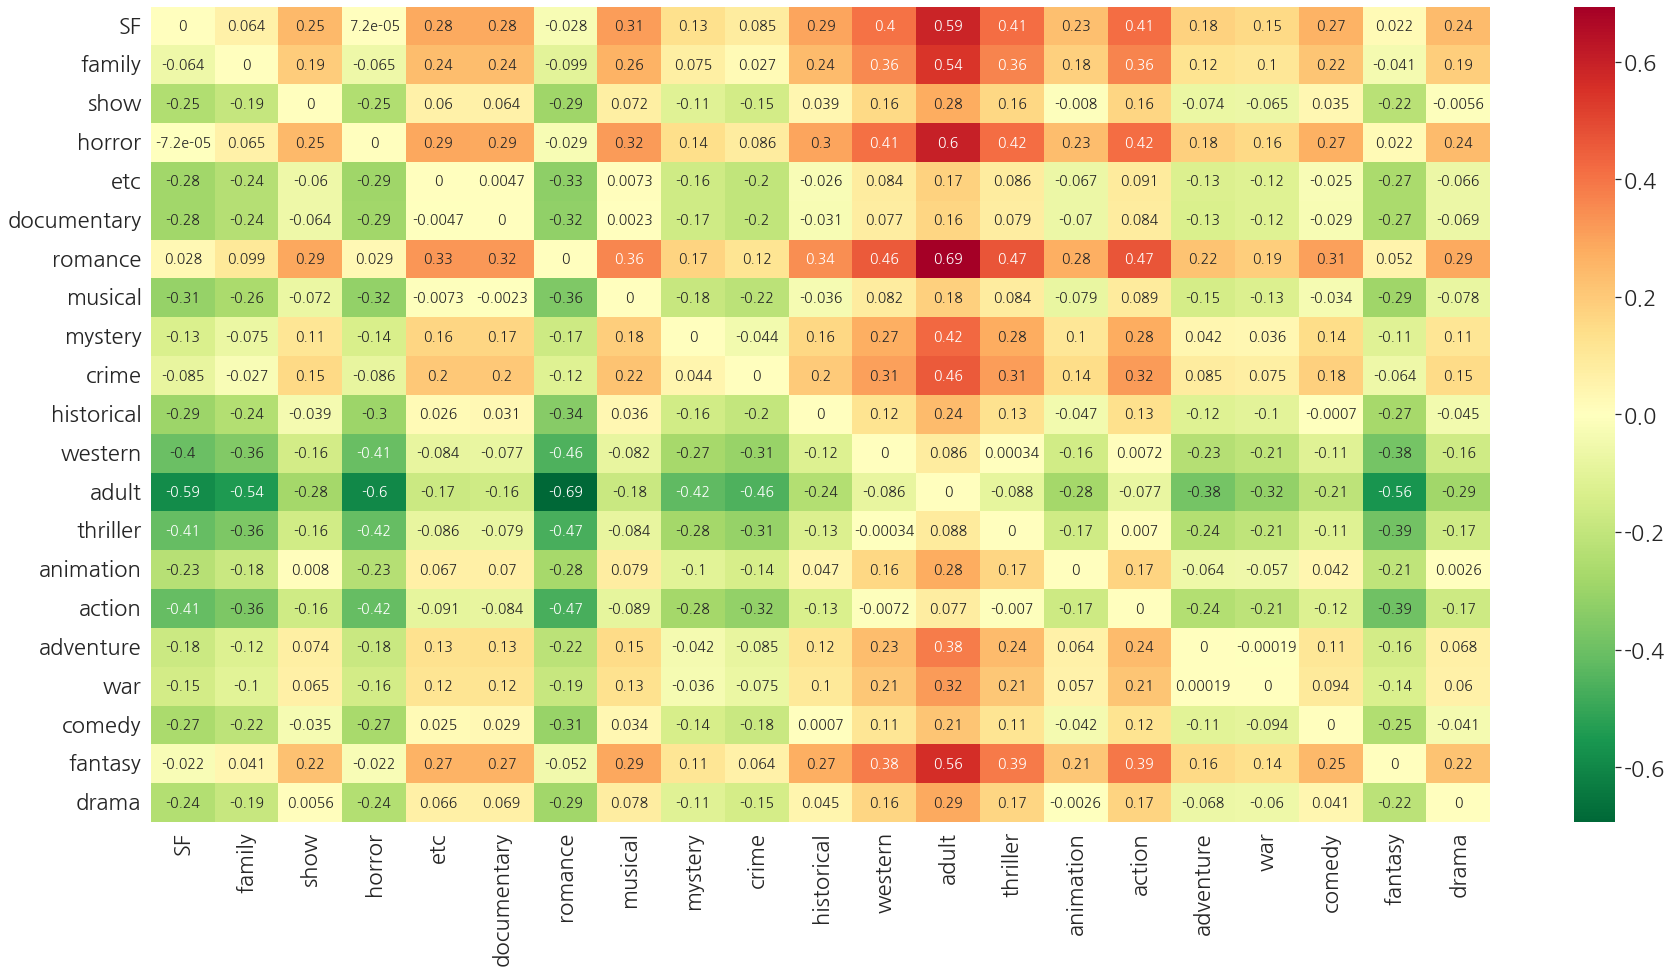

In [115]:
np.random.seed(0)

sns.set(font='NanumGothic',font_scale=2)

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True, annot_kws={'size':14}, cmap='RdYlGn_r')
sns.set(rc = {'figure.figsize':(30,15)})
ax

### 가장 편향성이 높은 두 장르(Romance, Adult)에 대한 히트맵

Text(0.5, 1.0, 'romance-adult')

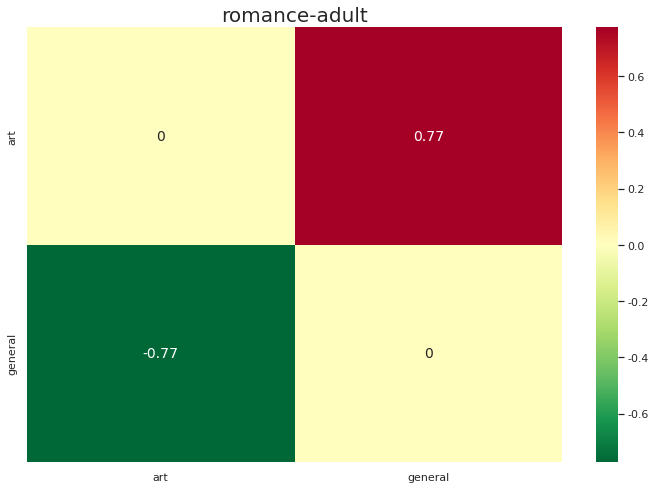

In [131]:
Matrix = [[0 for _ in range(2)]for _ in range(2)]
for k in range(2) :
    for l in range(2) :
        B[0] = np.array([model.wv[word] for word in attributes[0]])
        B[1] = np.array([model.wv[word] for word in attributes[1]])
        Matrix[k][l] = weat_score(B[k], B[l], C[6], C[12])

f.suptitle('Weat Scores Matrics between {} and {}'.format(genre_name[6],genre_name[12]), fontsize = 15)

ax = sns.heatmap(Matrix, xticklabels=sort_ag, yticklabels=sort_ag, annot=True, annot_kws={'size':14}, cmap='RdYlGn_r')
sns.set(rc = {'figure.figsize':(12,8)})
ax.set_title('{}-{}'.format(genre_name[6],genre_name[12]), fontsize = 20)

# 로맨스는 예술영화에, 성인영화는 일반영화에 가깝다.
        

<비고>
* 공식에 따라 Weat Score는 두 타깃벡터(영화장르 or 영화구분)의 교환에 반대칭적입니다.  
  히트맵에서 역대각선이 크기는 같고 부호는 반대로 나옵니다.   
        
* 총 3가지의 토큰을 산출하는 함수들을 정의했다. 이렇게 한 이유는 장르에 대한 txt 파일들을 불러오는    
  과정에서 계속 장르의 단어의 최대 인덱싱이 마지막으로 불러온 txt파일의 인덱스로 업데이트 되는    
  문제가 있었기 때문입니다. 따라서 새로 정의된 함수를 이용하여 이 각 장르의 단어들을 모두 합쳐서     
  하나의 단어장 S 를 만들었고 슬라이싱을 했습니다.    
      
  더 편한 방법 발견! : 가장 인덱싱이 많은 drama 파일을 제일 나중에 배치했습니다.    
    
* target_L 과 target_U : 인덱스 i에 대하여 target_L[i]는 i보다 나중에 오는 장르들의 단어를 모두 제외한  
  i번째 장르의 단어집이고 target_U[i-1]은 i보다 이전에 나온 단어들을 모두 제외한 i번째 장르의 단어집  
  입니다.  
  따라서 target_L은 i가 0일 때 딱 한번 쓰이고 나머지 인덱스의 장르들은 모두 target_U를 씁니다.  
  
* 장르간 가장 편향성이 높은 장르들은 romance와 adult 였습니다.  
  사람의 직관과 비슷하게, 작품성이 있는 영화는 로맨스 쪽이 많고 성인 영화는 작품성이 많이 떨어질  
  것이라는 점이 히트맵 결과와 일치했습니다.  
  